<hr style="border-top: 1px solid #001a79;" />

# Exercise 1

### Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.

In [1]:
import itertools
import random
import seaborn as sns

#### Calculate probability of selecting all 4 cups correctly by chance calculated from fractional probabilities in each step

Probability of selecting all 4 cups out of 8 correctly:

| Step | Number cups in the lot matching criteria | Total number of cups available | Probability |
| --- | --- | --- |---|
|Select 1st milk first cup | 4 | 8 | 4/8|
|Select 2nd milk first cup  | 3 | 7 | 3/7|
|Select 3rd milk first cup  | 2 | 6 | 2/6|
|Select 4th milk first cup  | 1 | 5 | 1/4|

These are independent events, so the final proability of selecting all 4 cups correctly can be calculated by multiplying probabilities frm each steps:

$$P_{all} = \frac{4}{8}*\frac{3}{7}*\frac{2}{6}*\frac{1}{5}$$

$$P_{all} = \frac{4*3*2*1}{8*7*6*5}$$

$$P_{all} = \frac{24}{1680} = \frac{1}{70}$$

#### Calculate probability of selecting all 4 cups correctly by chance using combinatorics

__[From Wikipedia](https://en.wikipedia.org/wiki/Combination)__

How many ways can we select 4 cups out of 8?

A Combination is a selection (a subset) of items from a set, such that the order of selection doesn't matter (in our example we don't care which cups is elected first and which last). The total number of the arrangements is given by the equation:

$$C^n_k = \frac{n!}{k!*(n-k)!}$$

where<br>
$n$ - size of the set,<br>
$k$ - size of the subset


In [2]:
prob=1
n=1
min_prob = 0.01

while prob>min_prob:

    N=2*n
    cups = list(range(N))
    cups

    poss = list(itertools.combinations(cups, n))
    
    prob = 1./len(poss)
    
    print("Number of possible ways to select {} cups from total of {} is {}".format(n, len(cups), len(poss)))
    print("Only 1 out of {} possibilities is the correct one, so the probability of corectly selecting it by chance is {:.3f}%".format(len(poss), prob*100 ) )
    print()
    
    n=n+1

Number of possible ways to select 1 cups from total of 2 is 2
Only 1 out of 2 possibilities is the correct one, so the probability of corectly selecting it by chance is 50.000%

Number of possible ways to select 2 cups from total of 4 is 6
Only 1 out of 6 possibilities is the correct one, so the probability of corectly selecting it by chance is 16.667%

Number of possible ways to select 3 cups from total of 6 is 20
Only 1 out of 20 possibilities is the correct one, so the probability of corectly selecting it by chance is 5.000%

Number of possible ways to select 4 cups from total of 8 is 70
Only 1 out of 70 possibilities is the correct one, so the probability of corectly selecting it by chance is 1.429%

Number of possible ways to select 5 cups from total of 10 is 252
Only 1 out of 252 possibilities is the correct one, so the probability of corectly selecting it by chance is 0.397%



#### *Bonus:* How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?

In [3]:
cups = list(range(8))
cups

poss = list(itertools.combinations(cups, 4))

In [4]:
# Define randomly which cups will have milk added firts
milkfirst = set(random.choice(poss))
print("These cups had milk added before the tea: {}".format(milkfirst))

These cups had milk added before the tea: {0, 1, 2, 7}


In [5]:
correct_selections=[]
for c in itertools.combinations(cups, 4):
    correct_selections.append(len(milkfirst & set(c)))

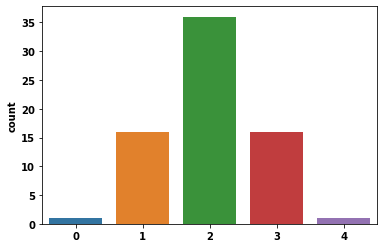

In [6]:
sns.countplot(x=correct_selections);

In [10]:
for correct in range(5):
    print("Number of possible ways to correctly select {} cups is {}".format(correct, correct_selections.count(correct)))

Number of possible ways to correctly select 0 cups is 1
Number of possible ways to correctly select 1 cups is 16
Number of possible ways to correctly select 2 cups is 36
Number of possible ways to correctly select 3 cups is 16
Number of possible ways to correctly select 4 cups is 1


In [12]:
# Probability of selecting at most 1 cups wrong in this scenario is:

prob1 = (correct_selections.count(4) + correct_selections.count(3))/len(correct_selections)

prob1

0.24285714285714285

In [19]:
prob1a = (4*3*2*4)/(8*7*6*5) * 4 + (4*3*2*1)/(8*7*6*5)
prob1a

0.24285714285714285

#### Probability of selecting all 3 cups correctly by chance calculated from fractional probabilities in each step

##### Probability of selecting first cup uncorectly and then all 3 following cups correctly:

| Step | Number cups in the lot matching criteria | Total number of cups available | Probability |
| --- | --- | --- |---|
|Select 1st tea first cup | 4 | 8 | 4/8|
|Select 1st milk first cup  | 4 | 7 | 4/7|
|Select 2nd milk first cup  | 3 | 6 | 3/6|
|Select 3rd milk first cup  | 2 | 5 | 2/4|

These are independent events, so the final proability of selecting all 4 cups correctly can be calculated by multiplying probabilities form each steps:

$$P_{all} = \frac{4}{8}*\frac{4}{7}*\frac{3}{6}*\frac{2}{5}$$

$$P_{all} = \frac{4*4*3*2}{8*7*6*5}$$

$$P_{all} = \frac{96}{1680} = \frac{4}{70}$$



##### Probability of selecting one incorrect cup at any step:

Probability of selecting one incorrect cup at any step would be a sum of probabilities of selecting incorrect cup only at first step (calculated above), only at second step, only at third step and only at fourts step. Because these events are qually likely to occur, the final probability of selecting one cup incorrectly would be:

$$P_{3-correct} = \frac{96}{1680} * 4 = \frac{16}{70}$$

<hr style="border-top: 1px solid #001a79;" />

# Exercise 2

### Use scipy's version of Fisher's exact test to simulate the Lady Tasting Tea problem.

In [8]:
import scipy